# Mapping COVID19 data in Python

## Help
- About this interface https://jupyterlab.readthedocs.io/en/stable/user/interface.html
- Jupyter keyboard shortcuts
https://yoursdata.net/jupyter-lab-shortcut-and-magic-functions-tips/
- Plotly Express documentation https://plotly.com/python/plotly-express/
- Working with csv and pandas https://towardsdatascience.com/data-science-with-python-intro-to-loading-and-subsetting-data-with-pandas-9f26895ddd7f

# Hello Jupyter Newbies

If this is the first time for you to use Jupyter Notebooks, I highly recommend you visit the help links above. 

In order to run the code sequentially on this page, highlight a cell (you should see a blue bar on the left side) and use the following keyboard shortcut to run the cell:

- `shift + enter`

This should take you to the next cell, where you can repeat `shift + enter` until you reach the end. You can modify the contents of any cell to experiment with the code, but note that doing so may impact the subsequent code.

## Libraries

For this session, we will be using two libraries: plotly and pandas. Make sure to install the libraries using `pip` or `conda`. If you have reached this Jupyter notebook via the IDRE GitHub page, or, if you installed Anaconda and ran `requirements.txt`, your library should already be installed. If not, uncomment the install code below and run them.


In [ ]:
# !conda install plotly --yes
# !conda install pandas

Import libraries

In [47]:
import plotly.express as px
import pandas as pd

## Data

The LA Times Data Desk team has taken the lead to centralize Los Angeles based COVID-19 related datasets. Shortly after the pandemic erupted in the US, they have maintained the following page to report real-time statistics.

https://www.latimes.com/projects/california-coronavirus-cases-tracking-outbreak/

In order to maintain transparency over their methods, they have made multiple datasets available on this GitHub page, allowing academics to use it for research purposes under these terms and services (https://www.latimes.com/terms-of-service).

https://github.com/datadesk/california-coronavirus-data

## Using Python's pandas library to get data

Get the data from LA Times. We can grab the data directly from their github page. By doing so, it ensures that we are grabbling the latest dataset that they have uploaded on their site. Note that it also adds the risk that if they change their data model, it can potentially break the methods used in this session.

- <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html" target="_blank">reference for pandas read_csv</a>

In [48]:
latimes = pd.read_csv(
    "https://raw.githubusercontent.com/datadesk/california-coronavirus-data/master/cdph-race-ethnicity.csv"
)

Preview the data by typing its name out. If you are using command line and not Jupyter, you have to use the print() method.

In [53]:
latimes.head(10)
# if using command line
# print(latimes)

,date,race,age,confirmed_cases_total,confirmed_cases_percent,deaths_total,deaths_percent,population_percent
0,2020-06-29,asian,0-17,287,0.024,0,0.000,0.130
1,2020-06-29,asian,18+,10603,0.076,871,0.150,0.165
2,2020-06-29,asian,18-34,2450,0.053,4,0.066,0.151
3,2020-06-29,asian,35-49,2776,0.073,22,0.077,0.179
4,2020-06-29,asian,50-64,2769,0.086,88,0.092,0.167
5,2020-06-29,asian,65-79,1470,0.101,229,0.123,0.172
6,2020-06-29,asian,80+,1138,0.150,528,0.199,0.172
7,2020-06-29,asian,all,10900,0.072,871,0.150,0.157
8,2020-06-29,black,0-17,218,0.018,0,0.000,0.054
9,2020-06-29,black,18+,6328,0.046,551,0.095,0.061


In [50]:
latimes.columns

Index(['date', 'race', 'age', 'confirmed_cases_total',
       'confirmed_cases_percent', 'deaths_total', 'deaths_percent',
       'population_percent'],
      dtype='object')

# heat map attempt

In [60]:
latimes_sum = latimes.query('age=="all"')

In [64]:
latimes['new_cases'] = latimes['confirmed_cases_total'].diff(periods=-1)
latimes

,date,race,age,confirmed_cases_total,confirmed_cases_percent,deaths_total,deaths_percent,population_percent,new_cases
0,2020-06-29,asian,0-17,287,0.024,0,0.000,0.130,-10316.0
1,2020-06-29,asian,18+,10603,0.076,871,0.150,0.165,8153.0
2,2020-06-29,asian,18-34,2450,0.053,4,0.066,0.151,-326.0
3,2020-06-29,asian,35-49,2776,0.073,22,0.077,0.179,7.0
4,2020-06-29,asian,50-64,2769,0.086,88,0.092,0.167,1299.0
...,...,...,...,...,...,...,...,...,...
1275,2020-05-14,white,35-49,2392,0.185,11,0.078,0.325,-670.0
1276,2020-05-14,white,50-64,3062,0.237,96,0.219,0.430,629.0
1277,2020-05-14,white,65-79,2433,0.360,312,0.337,0.540,768.0
1278,2020-05-14,white,80+,1665,0.438,569,0.421,0.572,-10291.0


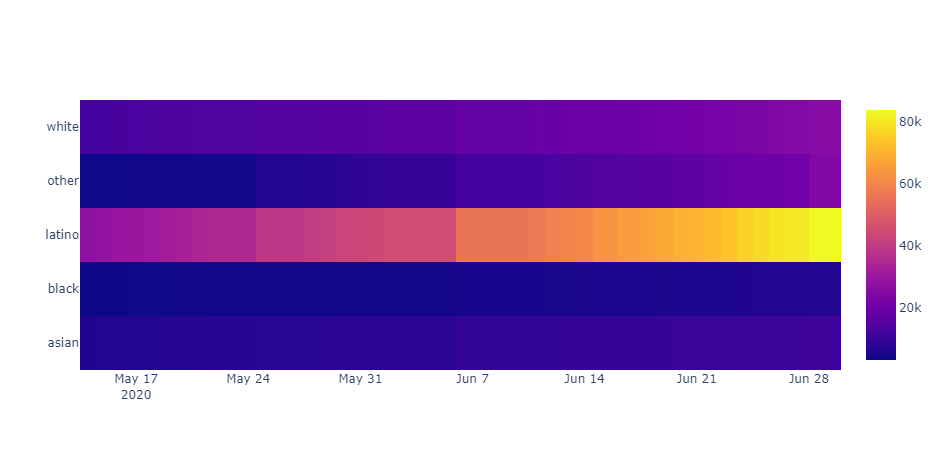

In [61]:
fig = go.Figure(data=go.Heatmap(
    z=latimes_sum.confirmed_cases_total,
    x=latimes_sum.date,
    y=latimes_sum.race
))
fig.show()

# Scatter Plots

Documentation: https://plotly.com/python/line-and-scatter/


Let's create a non-spatial scatter plot. We will use the <a href="https://plotly.com/python/plotly-express/" target="_blank">plotly express</a> library, which claims to be a "terse, consistent, high-level API for rapid data exploration and figure generation." It is also great for producing quick and easy maps, which is one of the main goals in this session! And, unlike other libraries, plotly express allows for user interaction with the graphic elements it produces.

To create a scatter plot use the `px.scatter` function. The first argument must be the data frame you want to feed it, in this case, we will use our full dataset, `latimes`. It must be followed with an `x` and `y` values. Let's put `date` in the x axis, and `confirmed_cases` in the y axis.

### Create a simple scatter plot

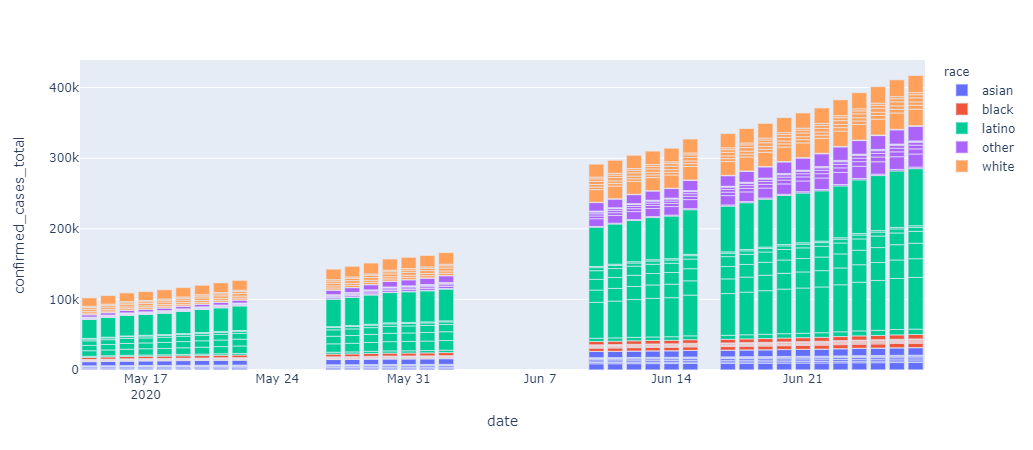

In [10]:
fig = px.bar(latimes,
           x="date",
           y="confirmed_cases_total",
            color="race")

# fig.update_xaxes(rangeslider_visible=True)
fig.show()

### Just get the most recent day's data

In [21]:
# get the last date
lastdate = latimes.iloc[0]['date']

# query for records for the last date
latimes_single_day = latimes.query('date==@lastdate')
latimes_single_day


,date,race,age,confirmed_cases_total,confirmed_cases_percent,deaths_total,deaths_percent,population_percent
0,2020-06-27,asian,0-17,271,0.024,0,0.000,0.130
1,2020-06-27,asian,18+,10342,0.079,853,0.150,0.165
2,2020-06-27,asian,18-34,2373,0.055,4,0.067,0.151
3,2020-06-27,asian,35-49,2709,0.075,22,0.078,0.179
4,2020-06-27,asian,50-64,2703,0.088,87,0.093,0.167
5,2020-06-27,asian,65-79,1438,0.103,221,0.121,0.172
6,2020-06-27,asian,80+,1119,0.152,519,0.199,0.172
7,2020-06-27,asian,all,10624,0.074,853,0.149,0.157
8,2020-06-27,black,0-17,197,0.018,0,0.000,0.054
9,2020-06-27,black,18+,6102,0.046,533,0.093,0.061


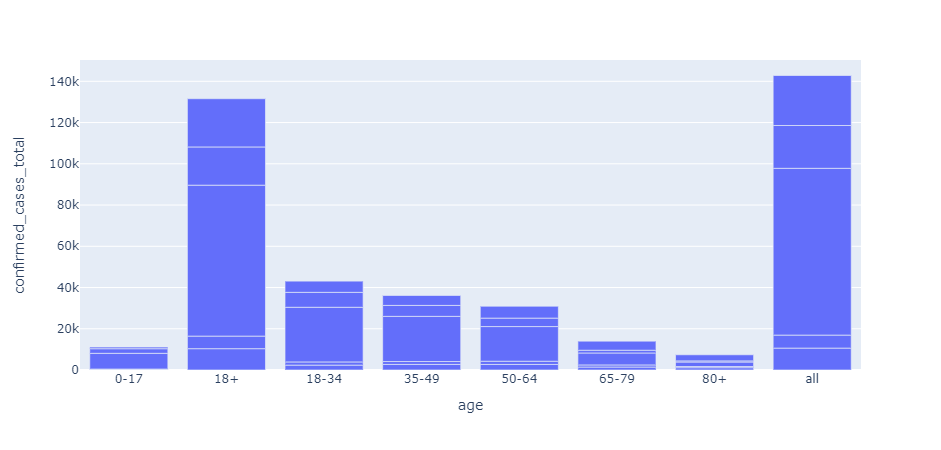

In [24]:
fig = px.bar(latimes_single_day,
           x="age",
           y="confirmed_cases_total")
             
# ,
#             color="race",
#             barmode="group"
# fig.update_xaxes(rangeslider_visible=True)
fig.show()

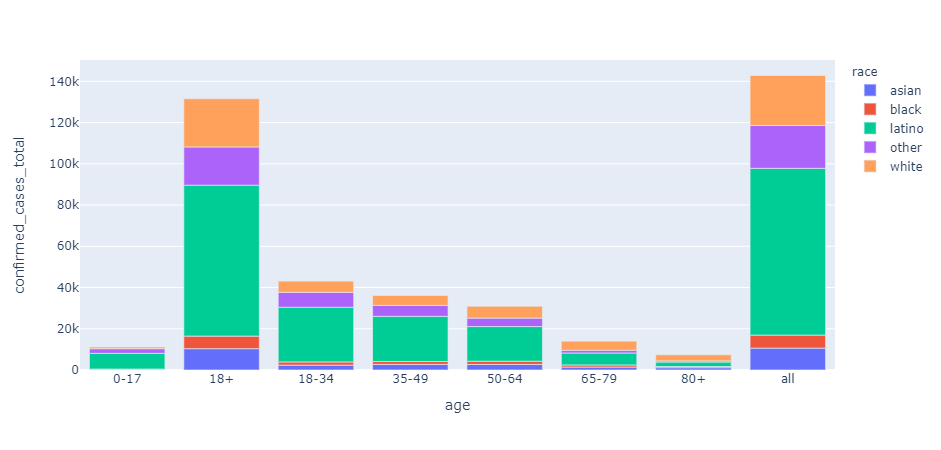

In [25]:
fig = px.bar(latimes_single_day,
           x="age",
           y="confirmed_cases_total",
            color="race")
             
# ,
#             color="race",
#             barmode="group"
# fig.update_xaxes(rangeslider_visible=True)
fig.show()

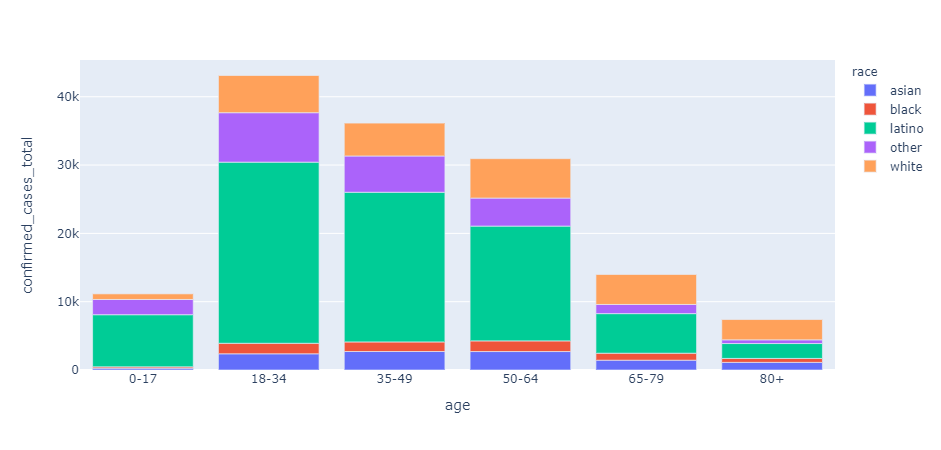

In [37]:
# get rid of "18+" and "all"
latimes_single_day_age = latimes.query("date==@lastdate and age in ('0-17','18-34','35-49','50-64','65-79','80+')")

fig = px.bar(latimes_single_day_age,
           x="age",
           y="confirmed_cases_total",
            color="race")
             
# # ,
# #             color="race",
# #             barmode="group"
# # fig.update_xaxes(rangeslider_visible=True)
fig.show()

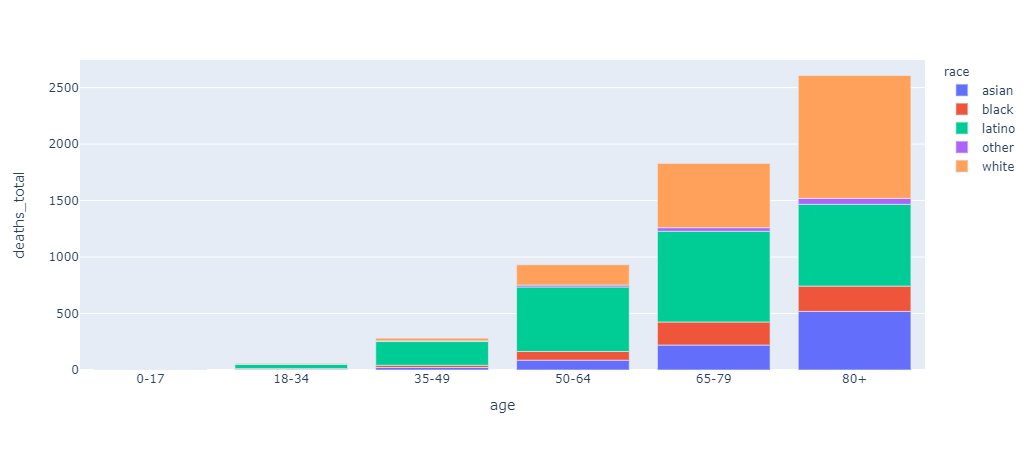

In [38]:
# get rid of "18+" and "all"
latimes_single_day_age = latimes.query("date==@lastdate and age in ('0-17','18-34','35-49','50-64','65-79','80+')")

fig = px.bar(latimes_single_day_age,
           x="age",
           y="deaths_total",
            color="race")
             
# # ,
# #             color="race",
# #             barmode="group"
# # fig.update_xaxes(rangeslider_visible=True)
fig.show()

Now let's put it into a plotly subplot

In [43]:
?go.bar


Type:        module
String form: <module 'plotly.graph_objs.bar' from 'C:\\Users\\Yoh Kawano\\anaconda3\\lib\\site-packages\\plotly\\graph_objs\\bar\\__init__.py'>
File:        c:\users\yoh kawano\anaconda3\lib\site-packages\plotly\graph_objs\bar\__init__.py
Docstring:   <no docstring>


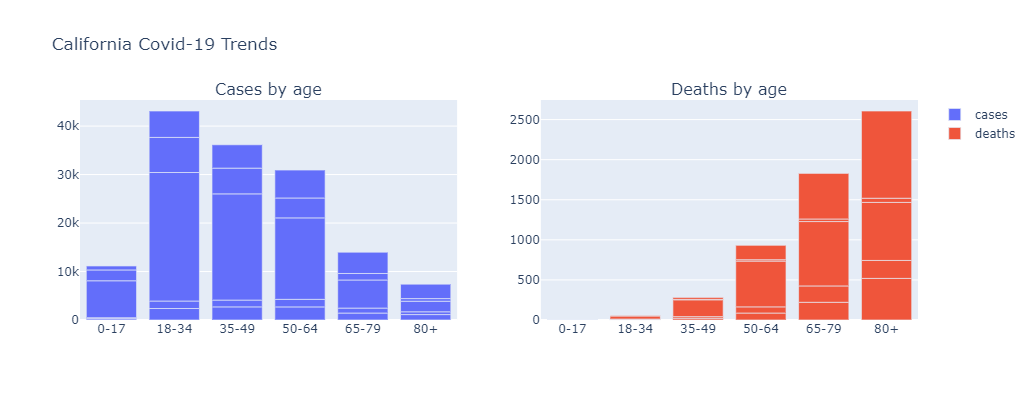

In [46]:
# import the plotly subplot library
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# define the subplots
fig = make_subplots(
            rows=1, 
            cols=2,
            subplot_titles=('Cases by age', 'Deaths by age'))

# add the first "trace"
fig.add_trace(
    go.Bar(x=latimes_single_day_age.age,
           y=latimes_single_day_age.confirmed_cases_total,
           name='cases'),
    row=1, col=1
)


fig = go.Figure(data=[
    go.Bar(name='SF Zoo', x=animals, y=[20, 14, 23]),
    go.Bar(name='LA Zoo', x=animals, y=[12, 18, 29])
])
# Change the bar mode
fig.update_layout(barmode='stack')




# add the second
fig.add_trace(
    go.Bar(x=latimes_single_day_age.age,
           y=latimes_single_day_age.deaths_total,
           name='deaths'),
    row=1, col=2
)

# define the layout for the whole figure
fig.update_layout(barmode='group',height=400, title_text="California Covid-19 Trends")
fig.update_layout()
fig.show()